In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils

# noinspection PyTypeChecker
df = pd.read_excel('data.xlsx', usecols=['№ эл-ра', 'Дата пуска', 'Дата откл.'])
df.columns = ['id', 'launch_date', 'failure_date']
df.describe()

,id,launch_date,failure_date
count,1555,1555,172
mean,1324.41,2016-12-14 18:47:55.369774848,2018-08-18 14:22:19.534883840
min,101,2013-08-20 00:00:00,2014-05-16 00:00:00
25%,566.5,2015-10-19 00:00:00,2018-03-15 00:00:00
50%,1448,2016-12-10 00:00:00,2018-11-25 00:00:00
75%,1935.5,2018-02-17 12:00:00,2019-05-05 18:00:00
max,2398,2019-04-20 00:00:00,2019-10-03 00:00:00
std,708.586,NaN,NaN


In [73]:
df = utils.calculate_days(df, '2012-08-20', '2019-10-10', '2019-12-10')
df.describe()

,id,launch_date,failure_date,failed_days,running_days
count,1555,1555,172,172,1383
mean,1324.41,2016-12-14 18:47:55.369774848,2018-08-18 14:22:19.534883840,1166.94,1021.18
min,101,2013-08-20 00:00:00,2014-05-16 00:00:00,212,234
25%,566.5,2015-10-19 00:00:00,2018-03-15 00:00:00,964.5,616
50%,1448,2016-12-10 00:00:00,2018-11-25 00:00:00,1181.5,999
75%,1935.5,2018-02-17 12:00:00,2019-05-05 18:00:00,1365.5,1404
max,2398,2019-04-20 00:00:00,2019-10-03 00:00:00,1984,2303
std,708.586,NaN,NaN,324.913,480.245


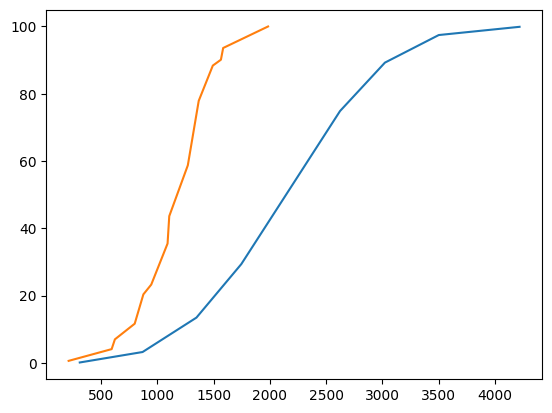

In [74]:
from reliability.Fitters import Fit_Weibull_2P

fit = Fit_Weibull_2P(failures=np.array(df[df['failed_days'].notnull()]['failed_days']),
                     right_censored=np.array(df[df['running_days'].notnull()]['running_days']), print_results=False,
                     show_probability_plot=False)

x, y = utils.weibull_cdf(fit.beta, fit.alpha)
x_2 = np.array(df['failed_days'].dropna())
y_2 = utils.cumulative_function_y(x_2) * 100

x, y = utils.optimize_curve(x, y, 0.01)
x_2, y_2 = utils.optimize_curve(x_2, y_2, 0.01)
ax = plt.gca()
plt.plot(x, y * 100)
plt.plot(x_2, y_2)